In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import warnings
warnings.filterwarnings('ignore')

/kaggle/input/nfl-big-data-bowl-2022/players.csv
/kaggle/input/nfl-big-data-bowl-2022/PFFScoutingData.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2019.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2020.csv
/kaggle/input/nfl-big-data-bowl-2022/games.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2018.csv
/kaggle/input/nfl-big-data-bowl-2022/plays.csv


Game data: The games.csv contains the teams playing in each game. The key variable is gameId.

Play data: The plays.csv file contains play-level information from each game. The key variables are gameId and playId.

Player data: The players.csv file contains player-level information from players that participated in any of the tracking data files. The key variable is nflId.

Tracking data: Files tracking[season].csv contain player tracking data from season [season]. The key variables are gameId, playId, and nflId.

PFF Scouting data: The PFFScoutingData.csv file contains play-level scouting information for each game. The key variables are gameId and playId.

In [2]:

scoutingData = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/PFFScoutingData.csv')
# tracking2018 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/tracking2018.csv')
# tracking2019 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/tracking2019.csv')
# tracking2020 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/tracking2020.csv')

In [3]:

print('The shape of dataset for Scouting :', scoutingData.shape)
# print('The shape of dataset for 2018 Season :', tracking2018.shape)
# print('The shape of dataset for 2019 Season :', tracking2019.shape)
# print('The shape of dataset for 2020 Season :', tracking2020.shape)

The shape of dataset for Scouting : (19979, 20)


## Processing and Exploring Player data

In [4]:
players = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/players.csv')
print('data loading complete...')
print('*'*50)
print('The shape of dataset for players :', players.shape)
print('*'*50)
display(players.head().T)
print('*'*50)
display(players.tail().T)
print('*'*50)
print('Unique values in player height :', players['height'].unique())
print('*'*50)

height = []

for i in players['height']:
    i = i.split('-')
    
    if len(i) == 1:
        height.append(int(i[0]))
        
    else:
        height.append((int(i[0])*12) + int(i[1]))
        
players['height'] = height

print('Height in inches of all players :', players['height'].unique())
print('*'*50)

print('Total Number of Colleges : ', players['collegeName'].nunique())
print('*'*50)
print('Top 20 Colleges contributing to player pool : \n', players['collegeName'].value_counts()[:20])
print('*'*50)
players['Position'].value_counts()

# Fixing the dates
players['birthDate'] = pd.to_datetime(players.birthDate)
players['birthDate'] = players['birthDate'].dt.strftime('%Y-%m-%d')
display(players.tail(10).T)

# Extracting Birthyear
players['birthYear'] = pd.DatetimeIndex(players['birthDate']).year

data loading complete...
**************************************************
The shape of dataset for players : (2732, 7)
**************************************************


,0,1,2,3,4
nflId,42901,43501,43534,43535,44174
height,6-1,6-0,6-0,6-1,6-1
weight,208,220,205,235,236
birthDate,1992-07-25,1994-08-11,1993-06-02,1992-12-22,1993-02-22
collegeName,James Madison,Central Michigan,Illinois,Temple,Texas Tech
Position,SS,FS,SS,MLB,ILB
displayName,Dean Marlowe,Kavon Frazier,Clayton Fejedelem,Tyler Matakevich,Sam Eguavoen


**************************************************


,2727,2728,2729,2730,2731
nflId,33216,33184,45651,41284,42849
height,6-3,6-3,5-9,73,5-10
weight,320,265,198,230,205
birthDate,06/16/1986,05/02/1985,06/16/1993,1992-10-20,12/14/1992
collegeName,Central Florida,Winston-Salem State,Iowa,LSU,Texas Tech
Position,G,DE,WR,RB,WR
displayName,Josh Sitton,William Hayes,Riley McCarron,Jeremy Hill,Bradley Marquez


**************************************************
Unique values in player height : ['6-1' '6-0' '6-4' '5-8' '5-10' '5-11' '6-6' '6-5' '6-3' '6-7' '6-2' '5-9'
 '5-7' '6-8' '6-9' '5-6' '76' '75' '74' '72' '71' '73' '70' '77' '78' '68'
 '66' '79' '69' '67']
**************************************************
Height in inches of all players : [73 72 76 68 70 71 78 77 75 79 74 69 67 80 81 66]
**************************************************
Total Number of Colleges :  322
**************************************************
Top 20 Colleges contributing to player pool : 
 Alabama            69
Ohio State         56
Florida            55
Louisiana State    52
Georgia            47
Penn State         45
Michigan           45
Miami              45
Notre Dame         44
Clemson            44
Florida State      42
Auburn             39
Oklahoma           37
Stanford           37
Washington         37
UCLA               36
Wisconsin          35
Utah               35
Texas              34
Iowa     

,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731
nflId,42527,44080,40027,37228,43511,33216,33184,45651,41284,42849
height,70,72,71,69,74,75,75,69,73,70
weight,195,236,185,188,242,320,265,198,230,205
birthDate,1992-01-02,1993-11-24,1991-02-07,1988-11-08,1993-07-08,1986-06-16,1985-05-02,1993-06-16,1992-10-20,1992-12-14
collegeName,Utah,San Diego State,Oregon State,Texas Christian,UCLA,Central Florida,Winston-Salem State,Iowa,LSU,Texas Tech
Position,WR,LS,WR,WR,OLB,G,DE,WR,RB,WR
displayName,Kaelin Clay,Jeff Overbaugh,Markus Wheaton,Jeremy Kerley,Aaron Wallace,Josh Sitton,William Hayes,Riley McCarron,Jeremy Hill,Bradley Marquez


In [5]:
college = players.groupby('collegeName').size().sort_values(0, ascending = False).reset_index()
college.columns = ['Name', 'Count']

[Text(0, 0, 'SS'),
 Text(1, 0, 'FS'),
 Text(2, 0, 'SS'),
 Text(3, 0, 'MLB'),
 Text(4, 0, 'ILB'),
 Text(5, 0, 'WR'),
 Text(6, 0, 'WR'),
 Text(7, 0, 'WR'),
 Text(8, 0, 'CB'),
 Text(9, 0, 'CB'),
 Text(10, 0, 'K'),
 Text(11, 0, 'ILB'),
 Text(12, 0, 'DB'),
 Text(13, 0, 'OLB'),
 Text(14, 0, 'FS'),
 Text(15, 0, 'DE'),
 Text(16, 0, 'TE'),
 Text(17, 0, 'MLB'),
 Text(18, 0, 'CB'),
 Text(19, 0, 'DE'),
 Text(20, 0, 'FS'),
 Text(21, 0, 'WR'),
 Text(22, 0, 'OLB'),
 Text(23, 0, 'T'),
 Text(24, 0, 'DT'),
 Text(25, 0, 'DT')]

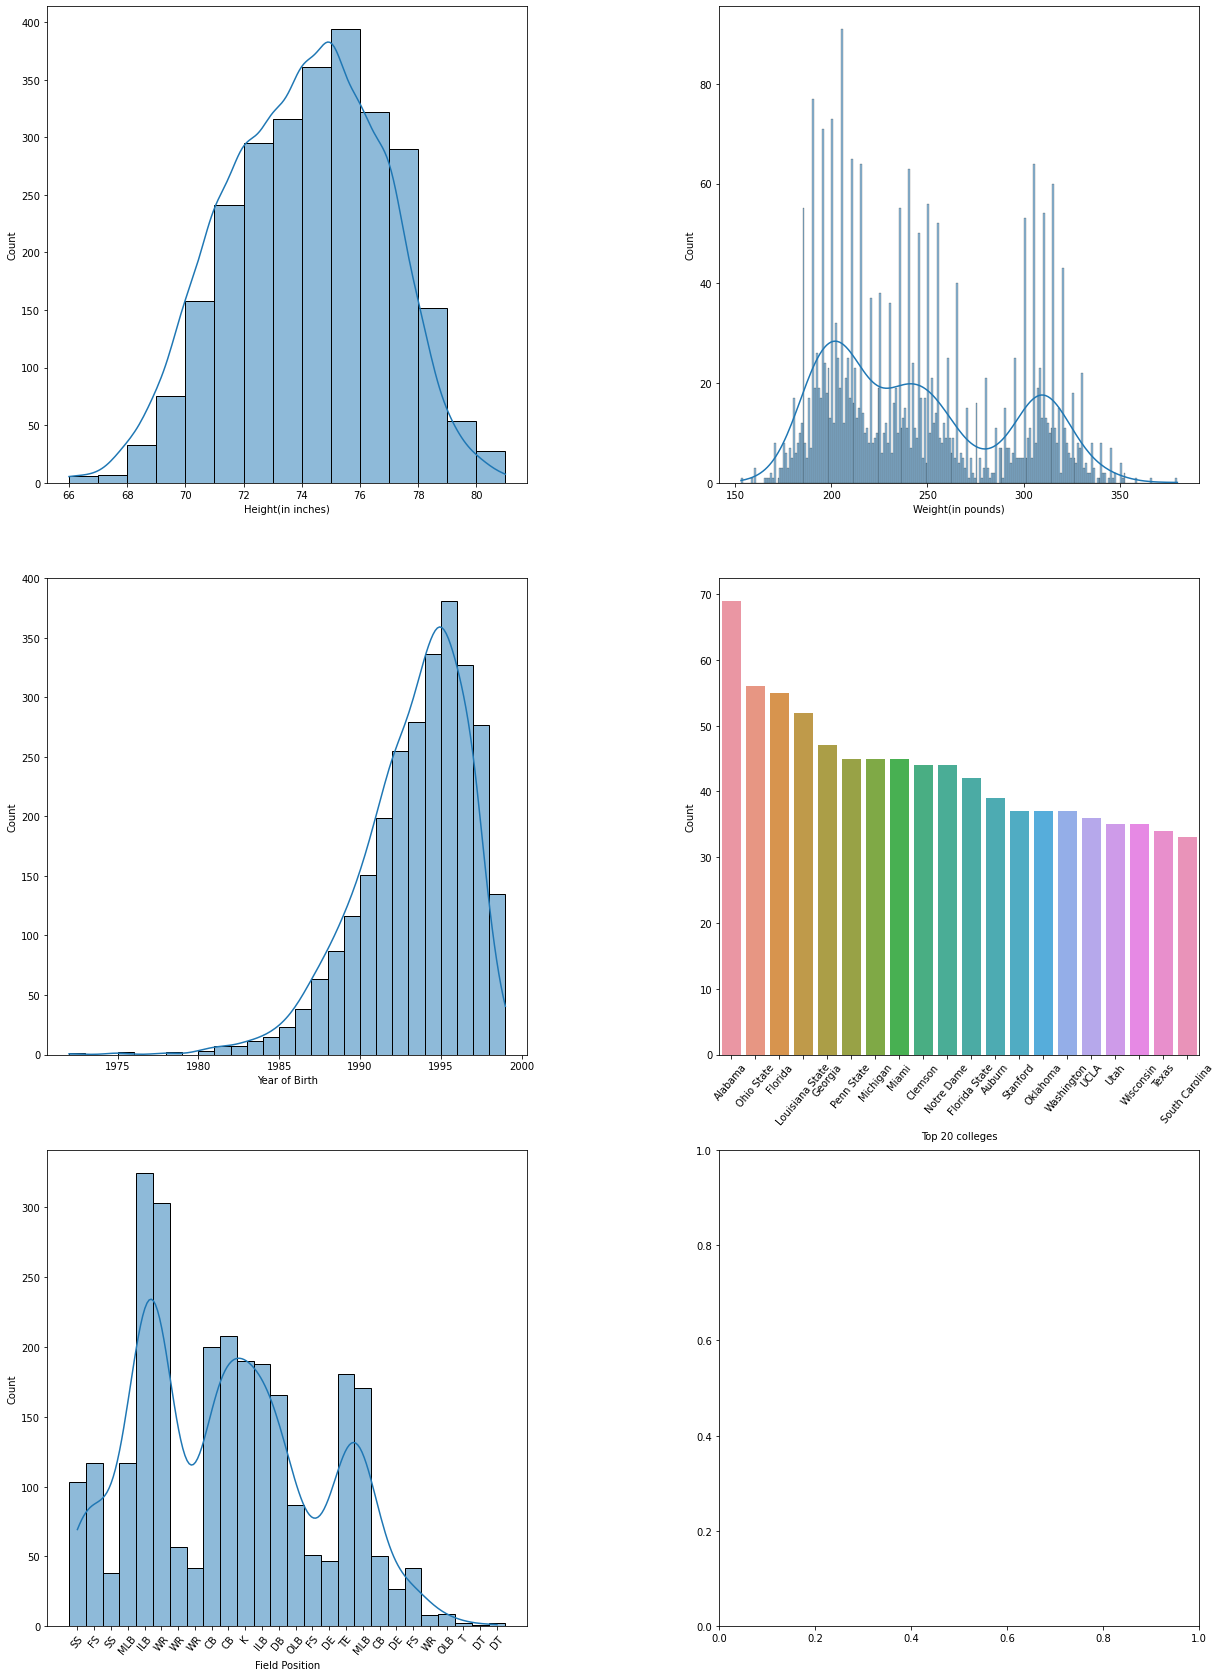

In [6]:
f, axs = plt.subplots(3,2, figsize = (20,15))

plt.subplots_adjust(left=0.1,bottom=0.5,right=0.9, top=2, wspace=0.4)


sns.histplot(players['height'],  binwidth = 1, kde = True, ax = axs[0,0])
axs[0,0].set_xlabel('Height(in inches)')

sns.histplot(players['weight'],  binwidth = 1, kde = True, ax = axs[0,1])
axs[0,1].set_xlabel('Weight(in pounds)')

sns.histplot(players['birthYear'],  binwidth = 1, kde = True, ax = axs[1,0])
axs[1,0].set_xlabel('Year of Birth')

sns.barplot( x = 'Name', y = 'Count', data = college[:20],  ax = axs[1,1])
axs[1,1].set_xlabel('Top 20 colleges')
axs[1,1].set_xticklabels(college['Name'][:20], rotation = 50)

sns.histplot(players['Position'],  binwidth = 1, kde = True, ax = axs[2,0])
axs[2,0].set_xlabel('Field Position')
axs[2,0].set_xticklabels(players['Position'], rotation = 50)

## Processing and Exploring Games data

In [7]:
games = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/games.csv')
print('The shape of dataset for games :', games.shape)

The shape of dataset for games : (764, 7)


In [8]:
games['gameDate'] = pd.to_datetime(games.gameDate)
games['gameDate'] = games['gameDate'].dt.strftime('%Y-%m-%d')
games['dayofweek'] = pd.to_datetime(games.gameDate).dt.dayofweek
games['gameMonth'] = pd.to_datetime(games.gameDate).dt.month
display(games.head().T)
display(games.tail().T)

,0,1,2,3,4
gameId,2018090600,2018090900,2018090901,2018090902,2018090903
season,2018,2018,2018,2018,2018
week,1,1,1,1,1
gameDate,2018-09-06,2018-09-09,2018-09-09,2018-09-09,2018-09-09
gameTimeEastern,20:20:00,13:00:00,13:00:00,13:00:00,13:00:00
homeTeamAbbr,PHI,BAL,CLE,IND,MIA
visitorTeamAbbr,ATL,BUF,PIT,CIN,TEN
dayofweek,3,6,6,6,6
gameMonth,9,9,9,9,9


,759,760,761,762,763
gameId,2021010311,2021010312,2021010313,2021010314,2021010315
season,2020,2020,2020,2020,2020
week,17,17,17,17,17
gameDate,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03
gameTimeEastern,16:25:00,16:25:00,16:25:00,16:25:00,16:25:00
homeTeamAbbr,DEN,HOU,IND,LA,SF
visitorTeamAbbr,LV,TEN,JAX,ARI,SEA
dayofweek,6,6,6,6,6
gameMonth,1,1,1,1,1


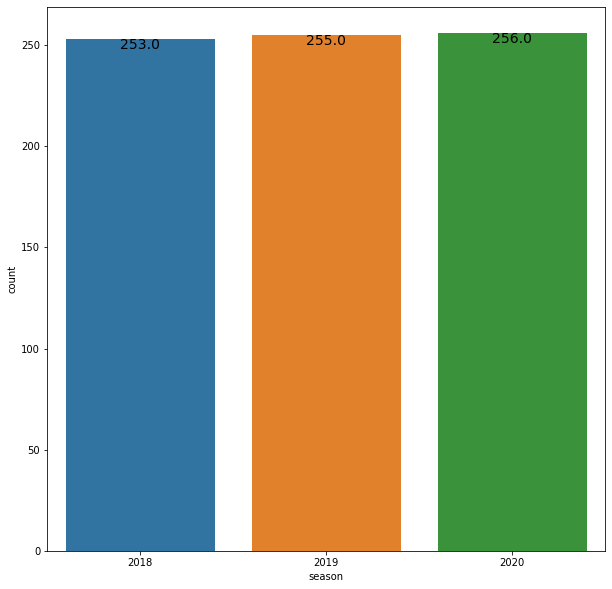

In [9]:
fig , ax = plt.subplots(figsize = (10,10))
sns.countplot(games['season'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5),ha='center', va='top', color='black', size=14)

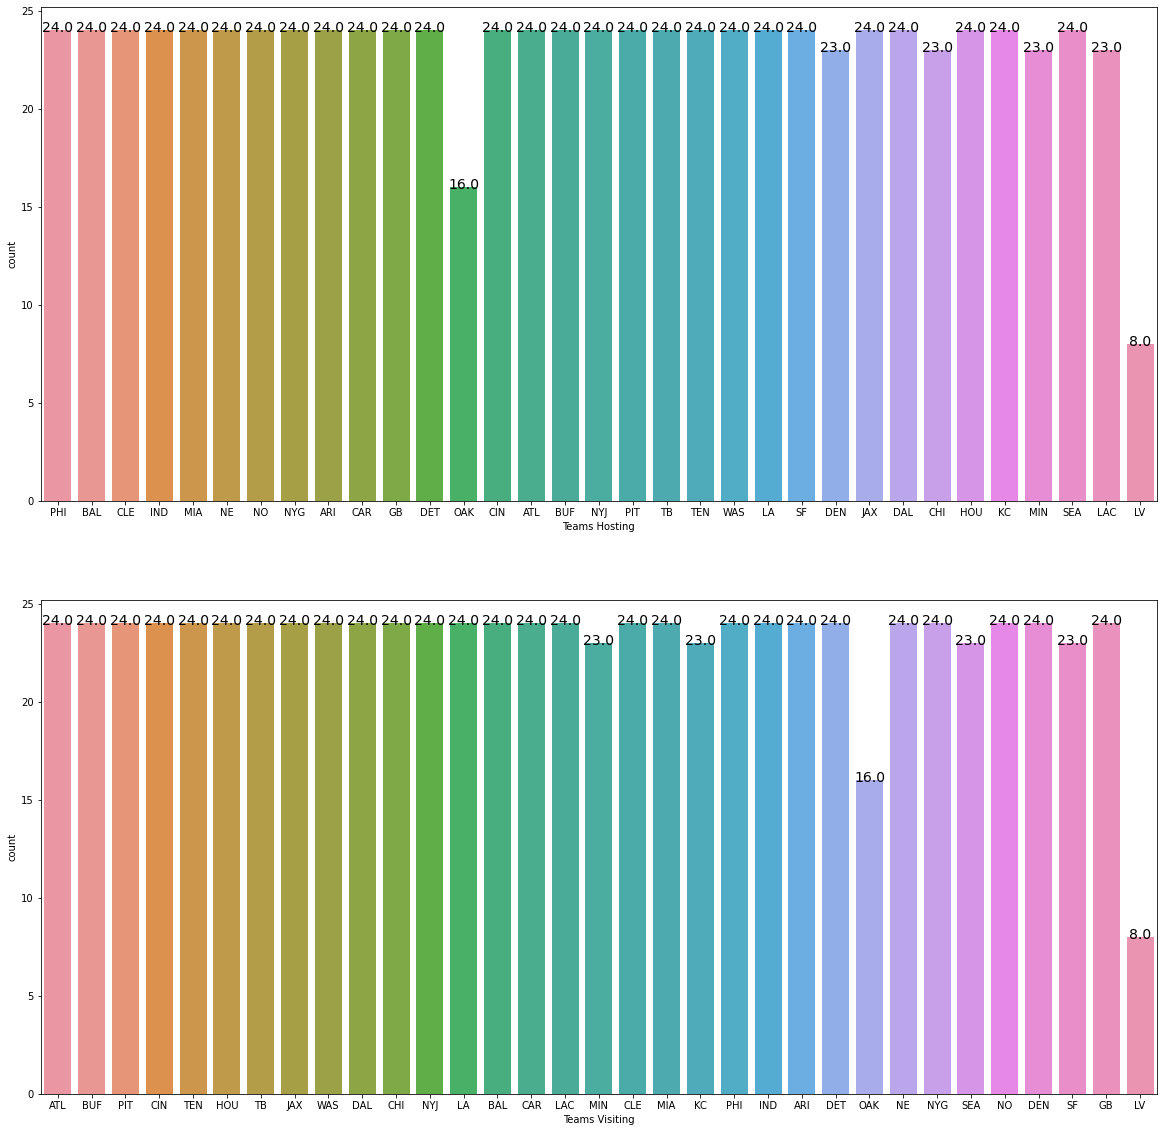

In [10]:
fig , ax = plt.subplots(2,1, figsize = (20,20))

sns.countplot(games['homeTeamAbbr'], ax = ax[0])
ax[0].set_xlabel('Teams Hosting')
for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5),ha='center', va='top', color='black', size=14)
    
sns.countplot(games['visitorTeamAbbr'], ax = ax[1])
ax[1].set_xlabel('Teams Visiting')
for p1 in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p1.get_height()), (p1.get_x()+0.4, p1.get_height()+0.5),ha='center', va='top', color='black', size=14)


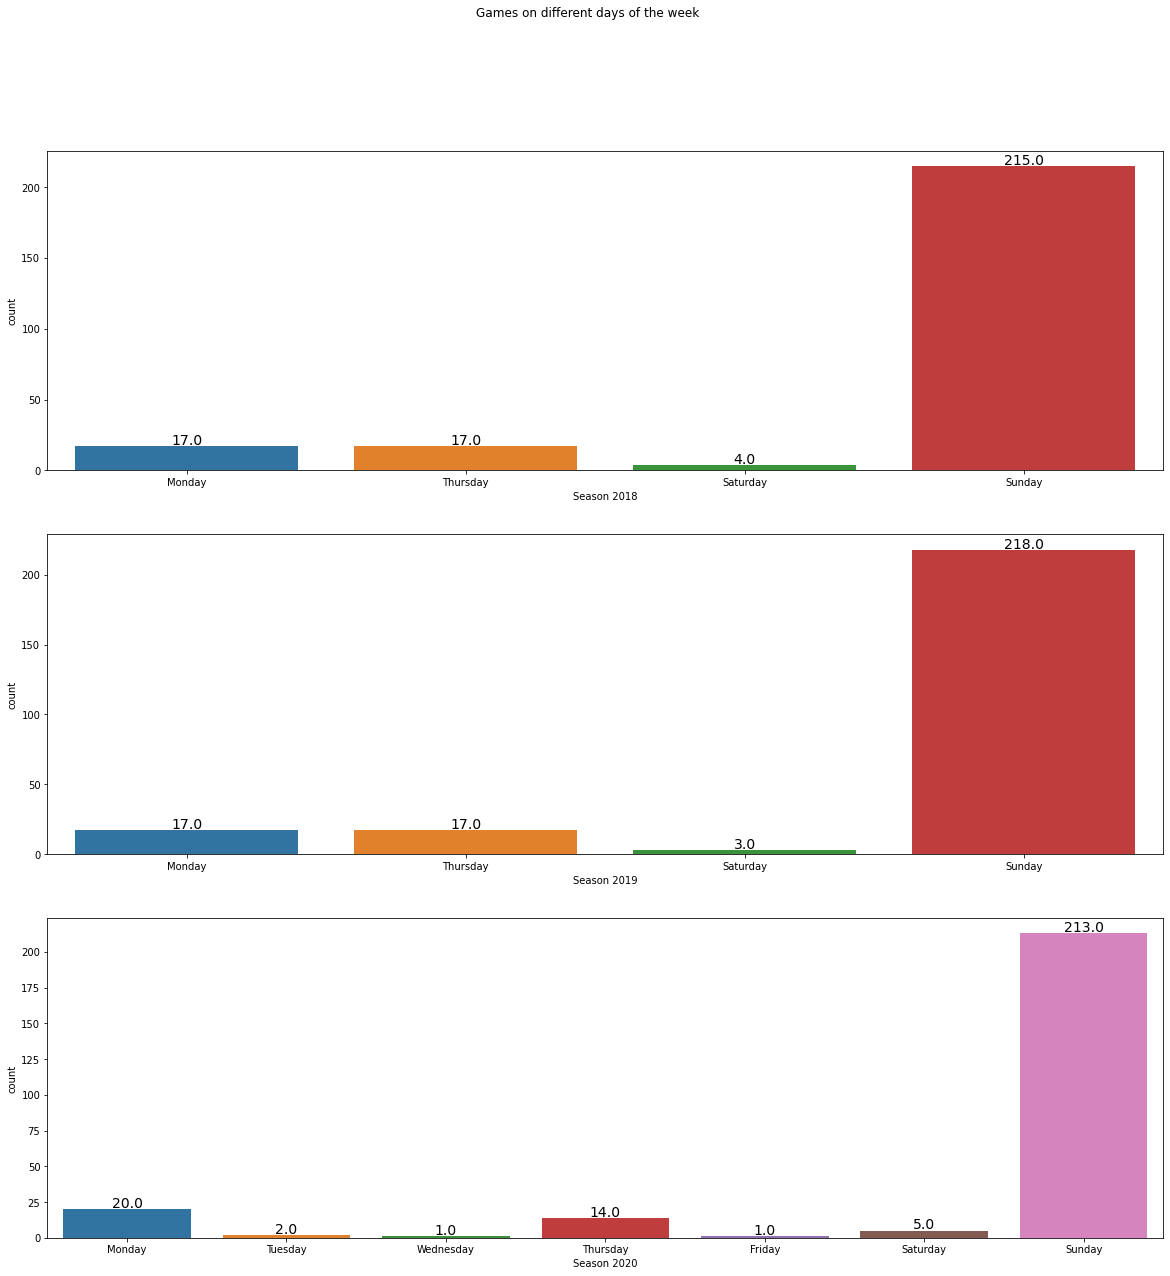

In [11]:
fig , ax = plt.subplots(3, 1, figsize = (20,20))

fig.suptitle('Games on different days of the week')

sns.countplot(x= 'dayofweek', data = games.loc[games['season'] == 2018], ax = ax[0])
ax[0].set_xlabel('Season 2018')
ax[0].set_xticklabels(['Monday','Thursday','Saturday','Sunday'])
for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+9),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'dayofweek', data = games.loc[games['season'] == 2019], ax = ax[1])
ax[1].set_xlabel('Season 2019')
ax[1].set_xticklabels(['Monday','Thursday','Saturday','Sunday'])
for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+9),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'dayofweek', data = games.loc[games['season'] == 2020], ax = ax[2])
ax[2].set_xlabel('Season 2020')
ax[2].set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
for p in ax[2].patches:
    ax[2].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+9),ha='center', va='top',\
                   color='black', size=14)

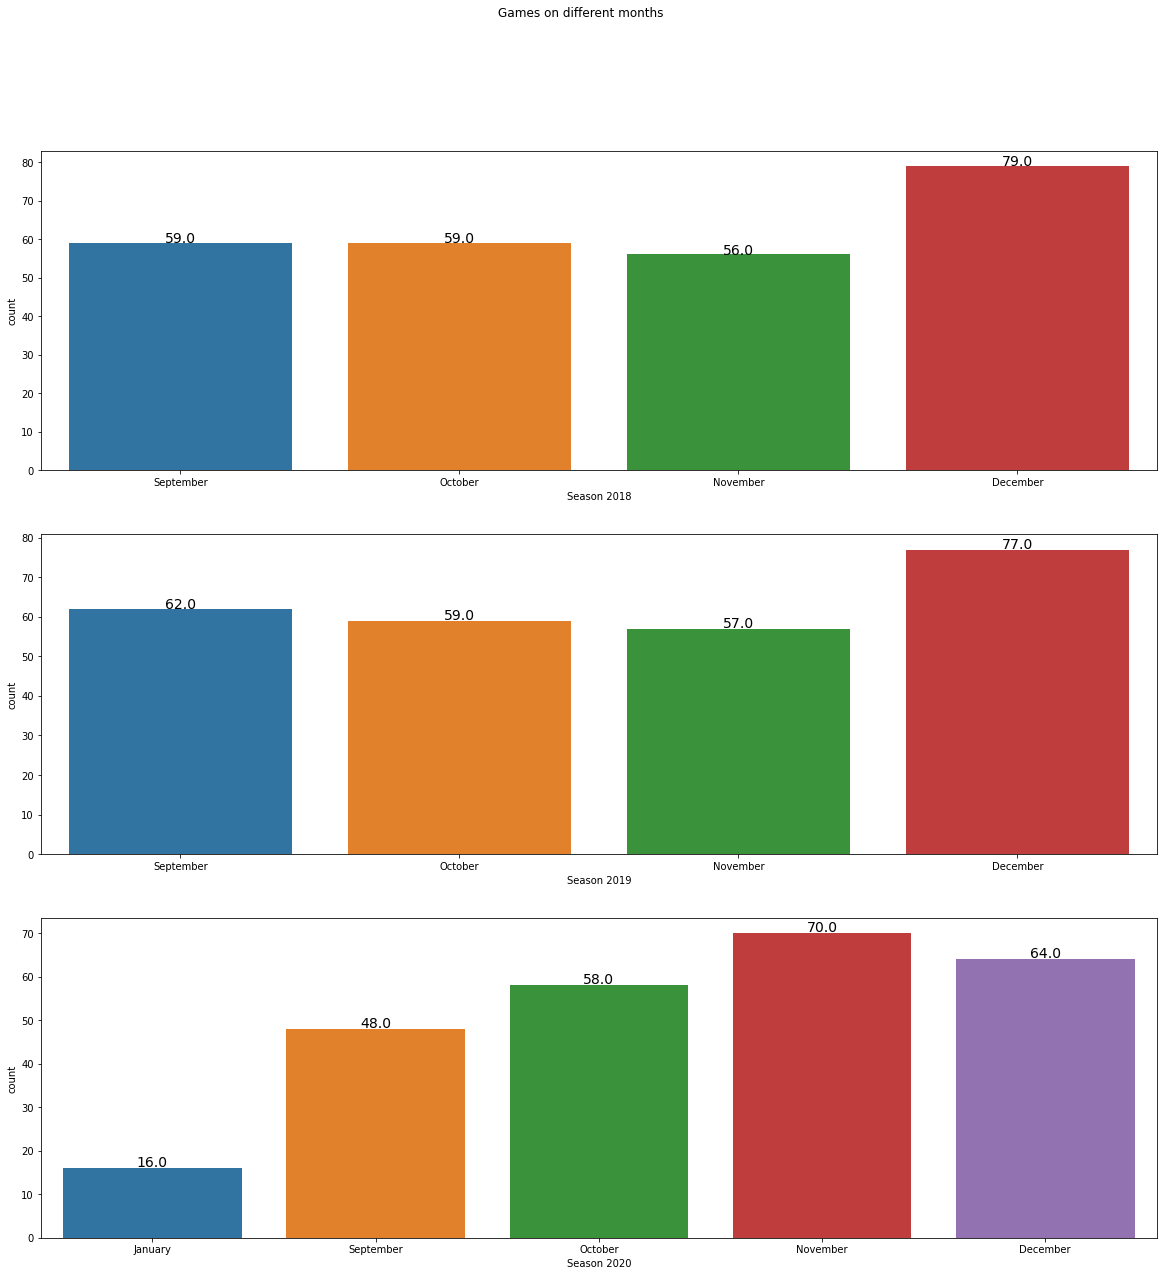

In [12]:
fig , ax = plt.subplots(3, 1, figsize = (20,20))

fig.suptitle('Games on different months')

sns.countplot(x= 'gameMonth', data = games.loc[games['season'] == 2018], ax = ax[0])
ax[0].set_xlabel('Season 2018')
ax[0].set_xticklabels(['September','October','November','December'])
for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+3),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'gameMonth', data = games.loc[games['season'] == 2019], ax = ax[1])
ax[1].set_xlabel('Season 2019')
ax[1].set_xticklabels(['September','October','November','December'])
for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+3),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'gameMonth', data = games.loc[games['season'] == 2020], ax = ax[2])
ax[2].set_xlabel('Season 2020')
ax[2].set_xticklabels(['January','September','October','November','December'])
for p in ax[2].patches:
    ax[2].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+3),ha='center', va='top',\
                   color='black', size=14)

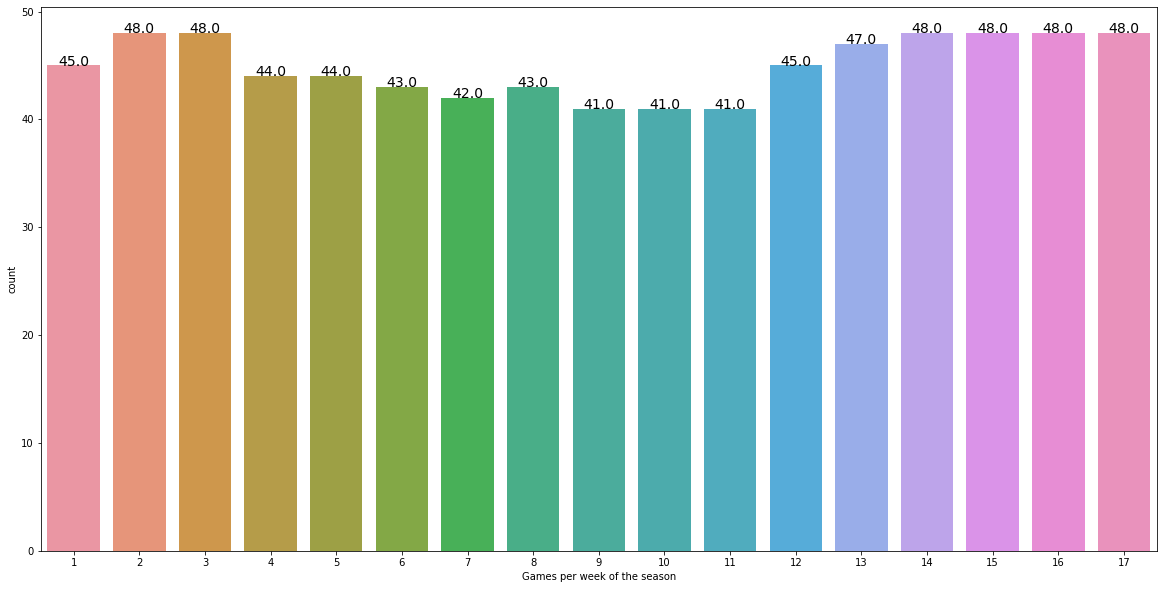

In [13]:
fig , ax = plt.subplots(figsize = (20,10))

sns.countplot(games['week'])
ax.set_xlabel('Games per week of the season')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+1),ha='center', va='top',\
                   color='black', size=14)

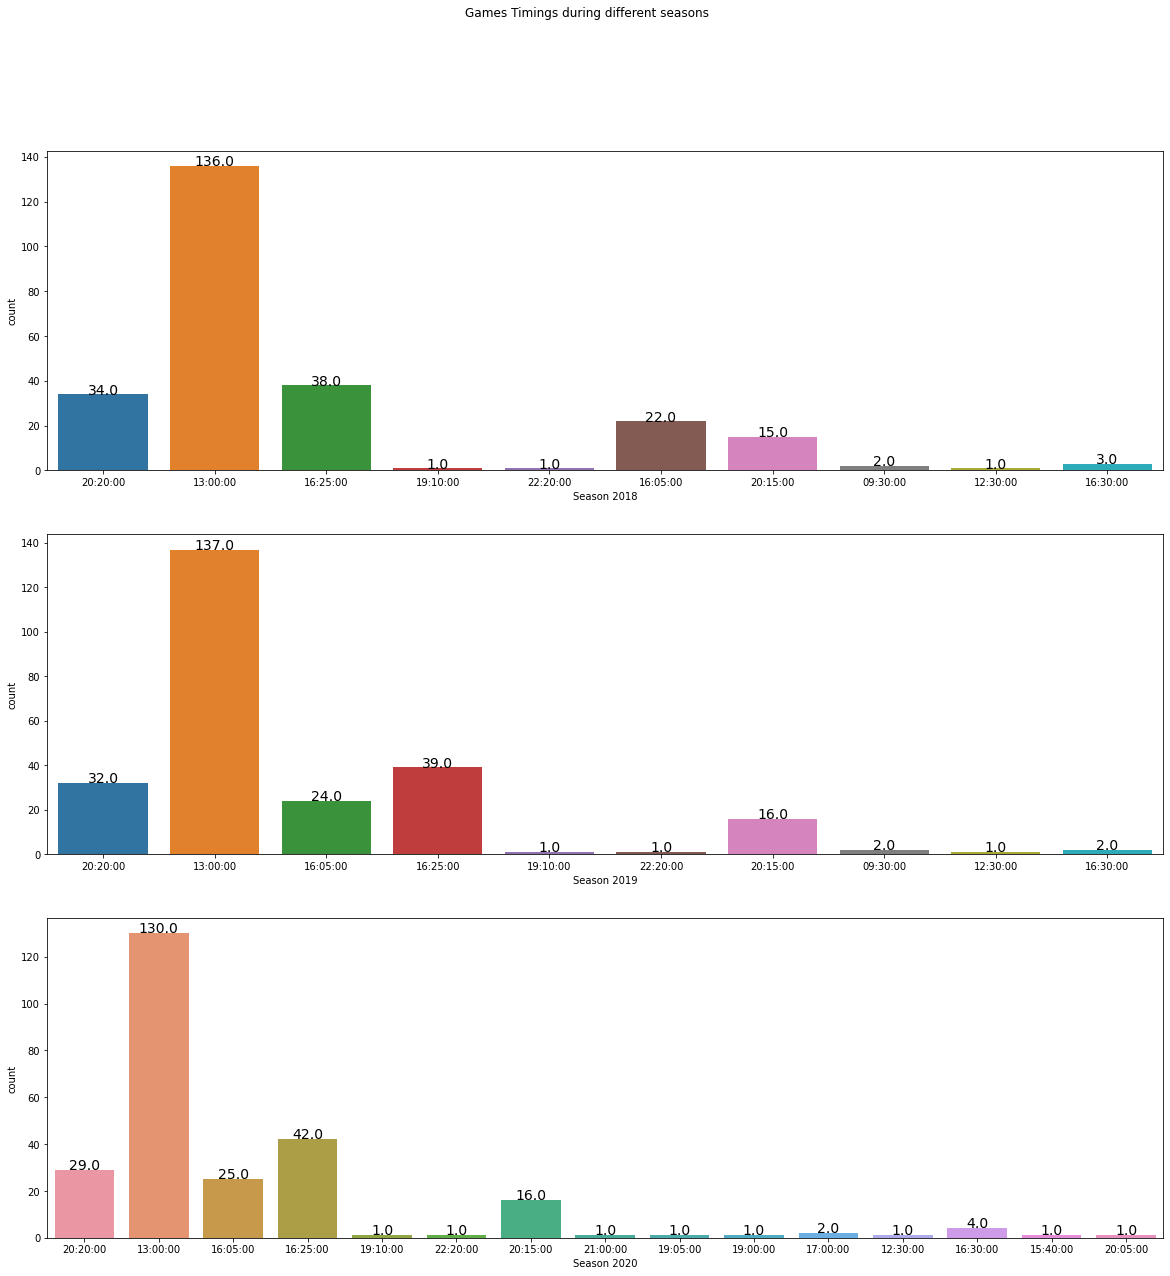

In [14]:
fig , ax = plt.subplots(3, 1, figsize = (20,20))

fig.suptitle('Games Timings during different seasons')

sns.countplot(x= 'gameTimeEastern', data = games.loc[games['season'] == 2018], ax = ax[0])
ax[0].set_xlabel('Season 2018')
for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+5),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'gameTimeEastern', data = games.loc[games['season'] == 2019], ax = ax[1])
ax[1].set_xlabel('Season 2019')
for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+5),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'gameTimeEastern', data = games.loc[games['season'] == 2020], ax = ax[2])
ax[2].set_xlabel('Season 2020')
for p in ax[2].patches:
    ax[2].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+5),ha='center', va='top',\
                   color='black', size=14)

## Processing Games and Exploring plays data

In [15]:
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/plays.csv')
print('The shape of dataset for plays :', plays.shape)

The shape of dataset for plays : (19979, 25)


In [16]:
#merge data with games data to extract more information
plays = plays.merge(games, on = 'gameId')

In [17]:
homeTeam = []
for i,j in zip(plays['homeTeamAbbr'], plays['possessionTeam']):
    if i == j:
        homeTeam.append(1)
    else:
        homeTeam.append(0)
    
plays['HomeTeamPossesion'] = homeTeam
plays.head().T

,0,1,2,3,4
gameId,2018090600,2018090600,2018090600,2018090600,2018090600
playId,37,366,658,677,872
playDescription,J.Elliott kicks 65 yards from PHI 35 to end zo...,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...","(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,"(:33) C.Johnston punts 65 yards to end zone, C..."
quarter,1,1,1,1,1
down,0,4,4,0,4
yardsToGo,0,4,3,0,18
possessionTeam,PHI,PHI,ATL,ATL,PHI
specialTeamsPlayType,Kickoff,Punt,Field Goal,Kickoff,Punt
specialTeamsResult,Touchback,Return,Kick Attempt Good,Return,Touchback
kickerId,44966.0,45603.0,27091.0,37267.0,45603.0


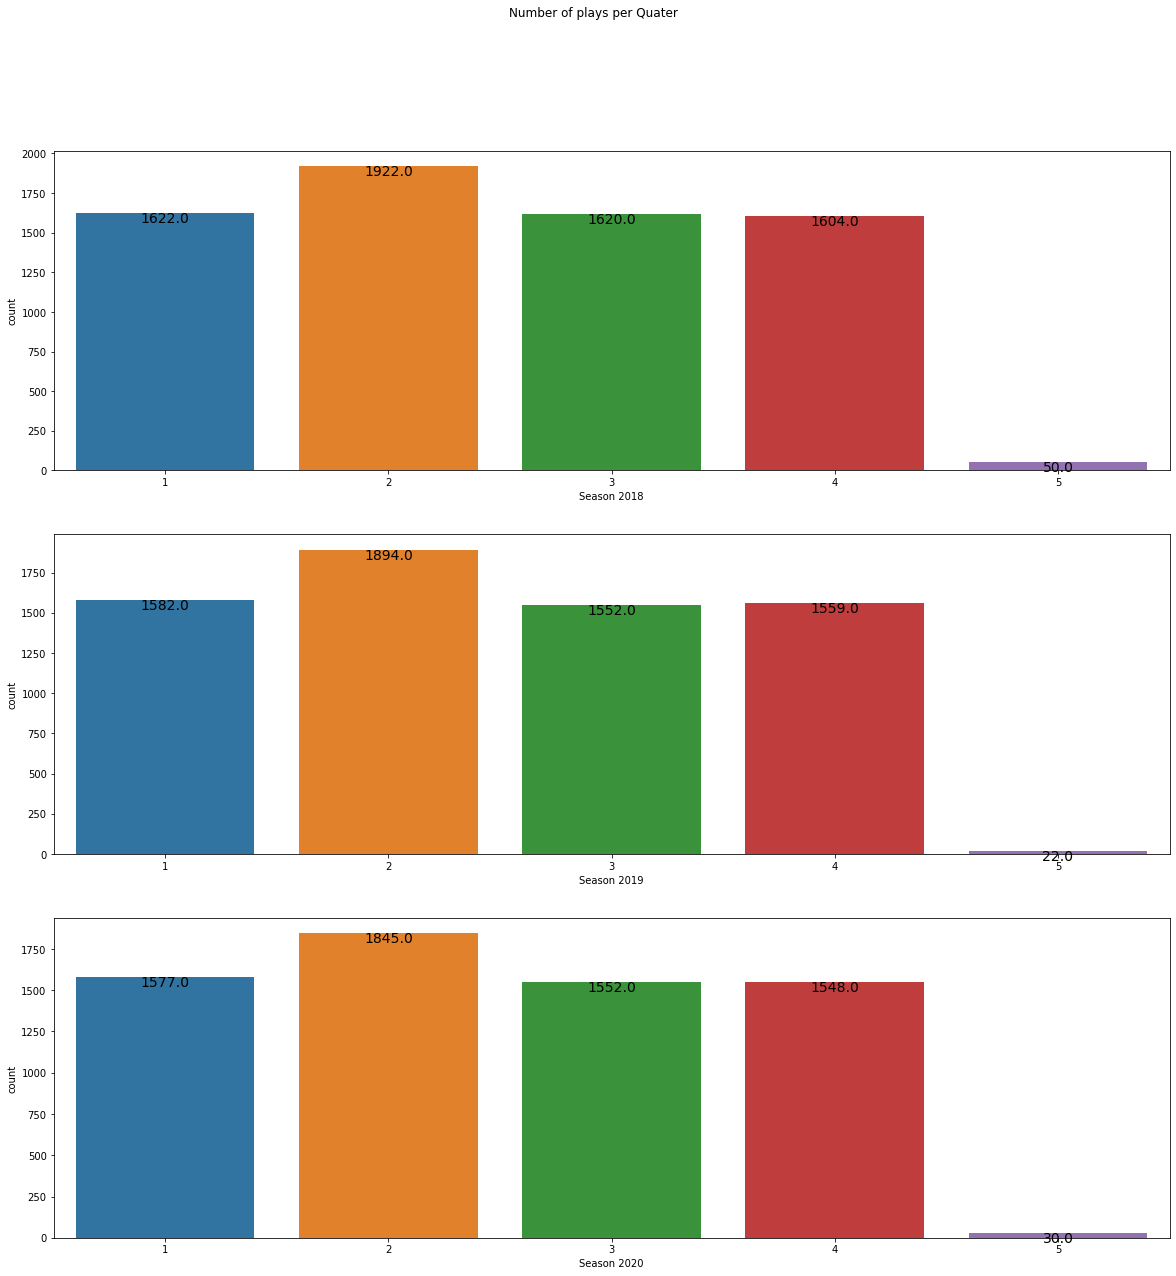

In [18]:
fig , ax = plt.subplots(3, 1, figsize = (20,20))

fig.suptitle('Number of plays per Quater')

sns.countplot(x= 'quarter', data = plays.loc[plays['season'] == 2018], ax = ax[0])
ax[0].set_xlabel('Season 2018')
# ax[0].set_xticklabels(['September','October','November','December'])
for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+10),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'quarter', data = plays.loc[plays['season'] == 2019], ax = ax[1])
ax[1].set_xlabel('Season 2019')
# ax[1].set_xticklabels(['September','October','November','December'])
for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+10),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'quarter', data = plays.loc[plays['season'] == 2020], ax = ax[2])
ax[2].set_xlabel('Season 2020')
# ax[2].set_xticklabels(['January','September','October','November','December'])
for p in ax[2].patches:
    ax[2].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+10),ha='center', va='top',\
                   color='black', size=14)

Text(0, 0.5, 'Team in Possession')

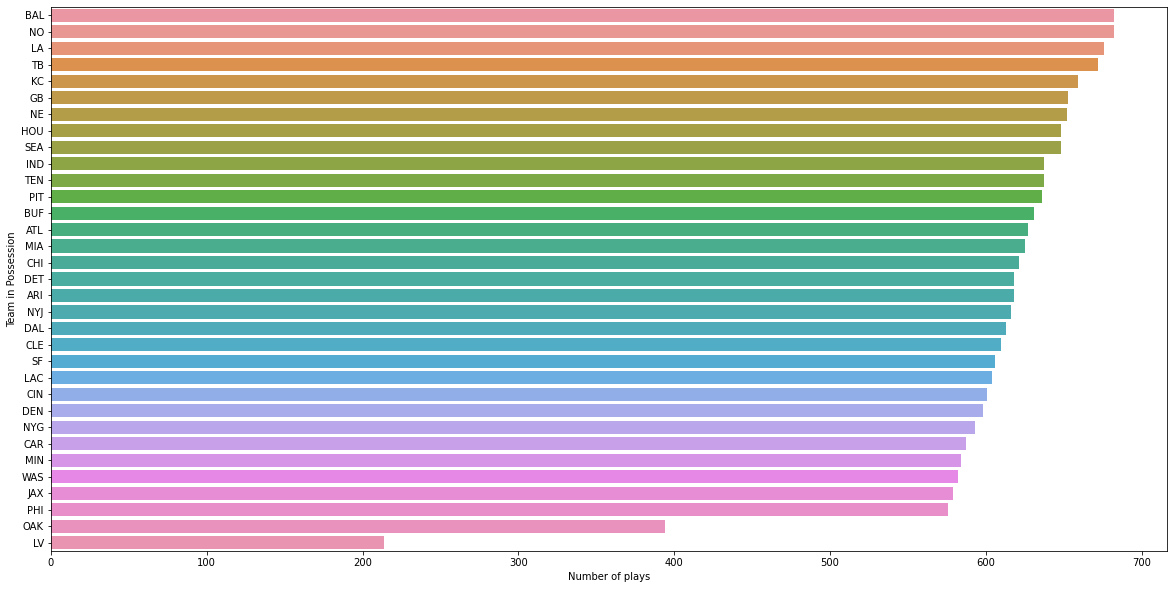

In [19]:
fig , ax = plt.subplots(figsize = (20,10))

sns.countplot(y = plays['possessionTeam'], order = plays['possessionTeam'].value_counts().index)
ax.set_xlabel('Number of plays')
ax.set_ylabel('Team in Possession')
# for p in ax.patches:
#     ax.annotate('{:.1f}'.format(p.get_x()), (p.get_height()+1, p.get_x()+0.4),\
#                    color='black', size=14)



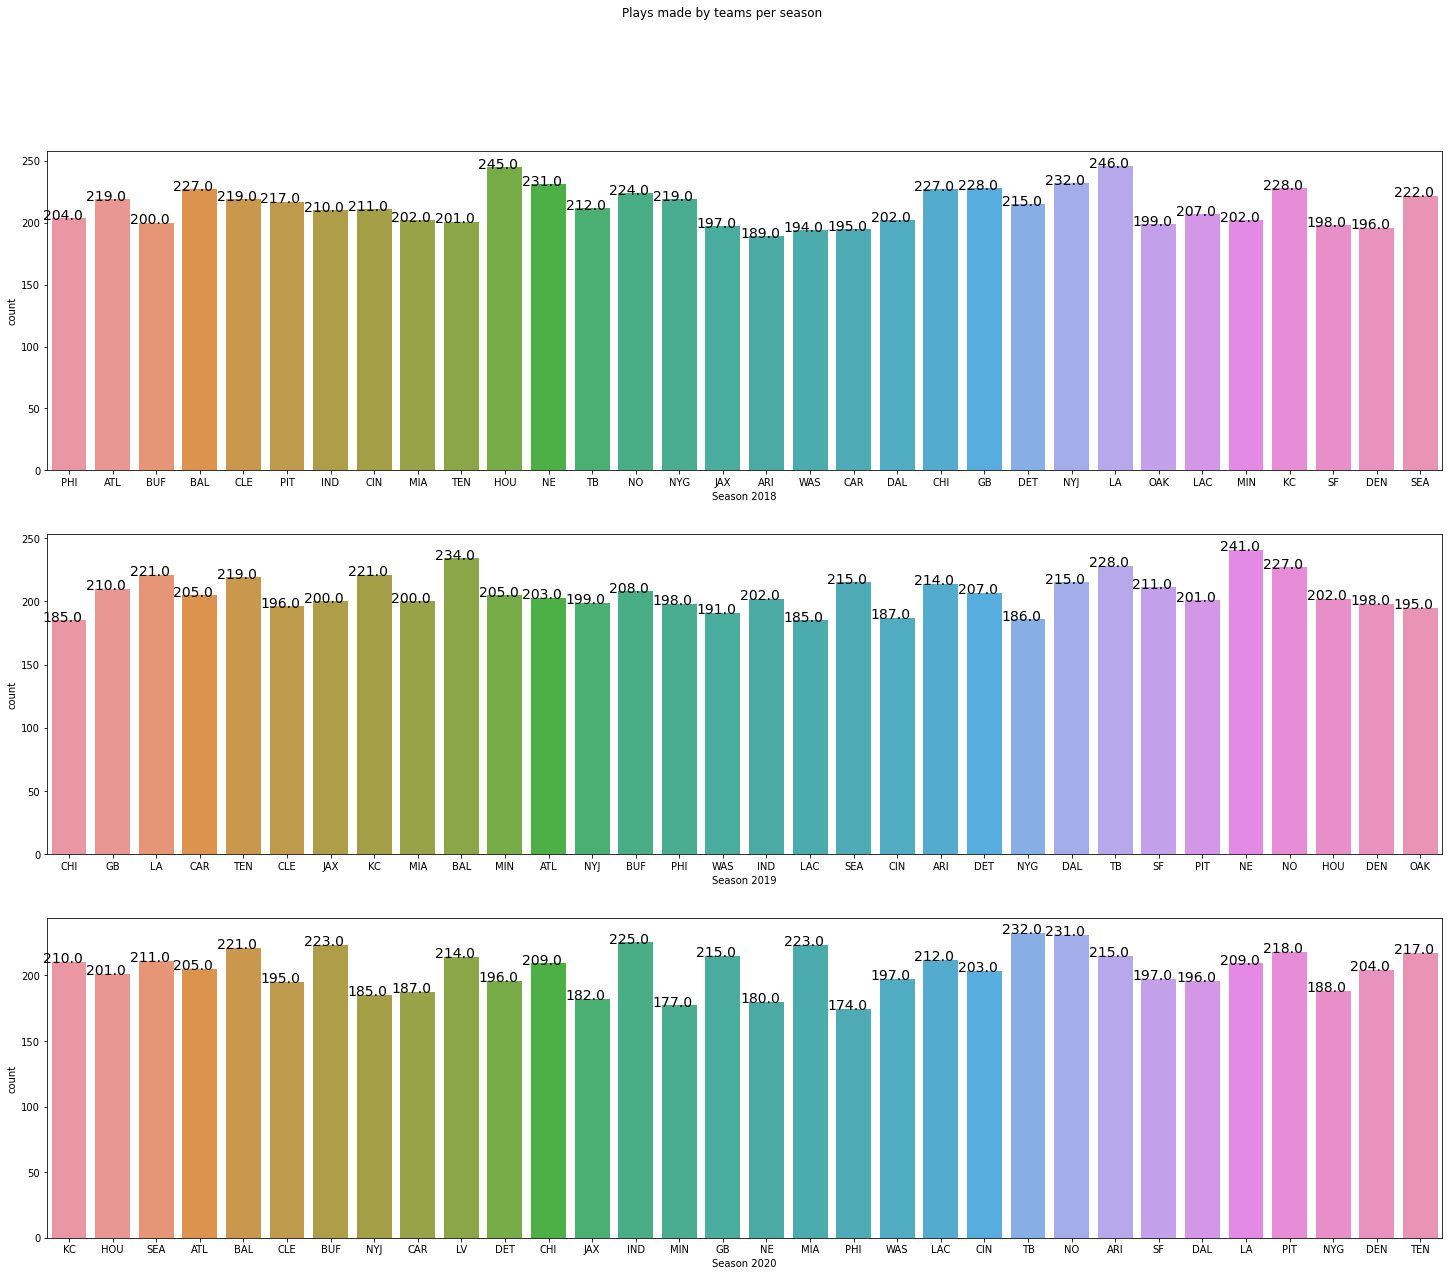

In [20]:
fig , ax = plt.subplots(3, 1, figsize = (25,20))

fig.suptitle('Plays made by teams per season')

sns.countplot(x= 'possessionTeam', data = plays.loc[plays['season'] == 2018],ax = ax[0])
ax[0].set_xlabel('Season 2018')
# ax[0].set_xticklabels(['September','October','November','December'])
for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+8),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'possessionTeam', data = plays.loc[plays['season'] == 2019], ax = ax[1])
ax[1].set_xlabel('Season 2019')
# ax[1].set_xticklabels(['September','October','November','December'])
for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+8),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'possessionTeam', data = plays.loc[plays['season'] == 2020], ax = ax[2])
ax[2].set_xlabel('Season 2020')
# ax[2].set_xticklabels(['January','September','October','November','December'])
for p in ax[2].patches:
    ax[2].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+8),ha='center', va='top',\
                   color='black', size=14)

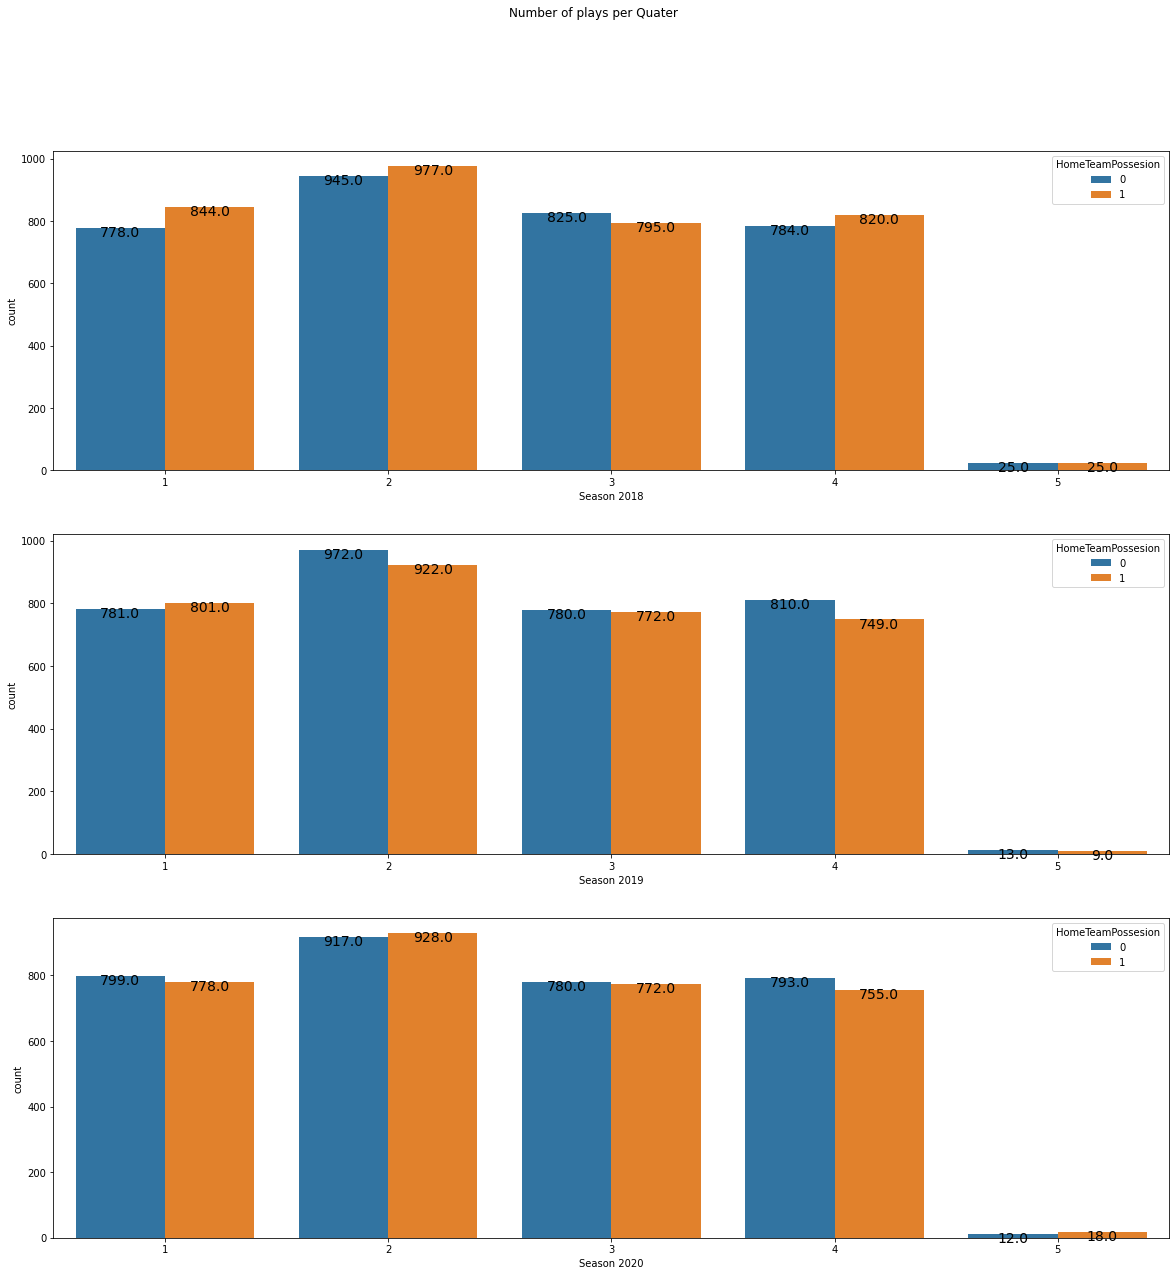

In [21]:
fig , ax = plt.subplots(3, 1, figsize = (20,20))

fig.suptitle('Number of plays per Quater')

sns.countplot(x= 'quarter', data = plays.loc[plays['season'] == 2018], hue = 'HomeTeamPossesion',ax = ax[0])
ax[0].set_xlabel('Season 2018')
# ax[0].set_xticklabels(['September','October','November','December'])
for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+8),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'quarter', data = plays.loc[plays['season'] == 2019], hue = 'HomeTeamPossesion', ax = ax[1])
ax[1].set_xlabel('Season 2019')
# ax[1].set_xticklabels(['September','October','November','December'])
for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+8),ha='center', va='top',\
                   color='black', size=14)
    
sns.countplot(x= 'quarter', data = plays.loc[plays['season'] == 2020], hue = 'HomeTeamPossesion', ax = ax[2])
ax[2].set_xlabel('Season 2020')
# ax[2].set_xticklabels(['January','September','October','November','December'])
for p in ax[2].patches:
    ax[2].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+8),ha='center', va='top',\
                   color='black', size=14)

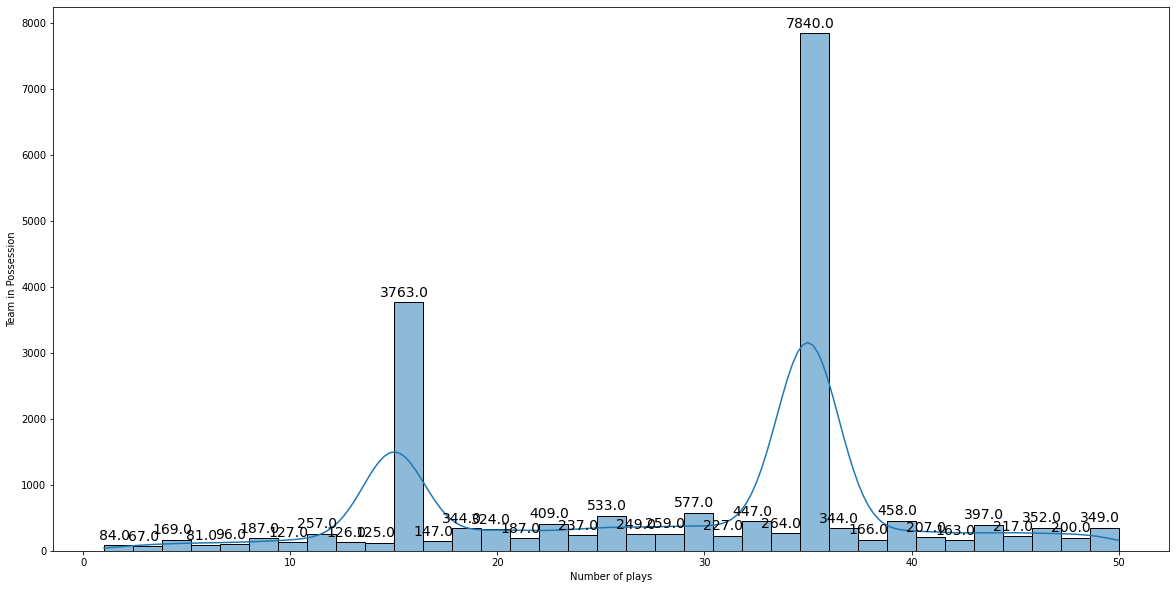

In [22]:
fig , ax = plt.subplots(figsize = (20,10))
# , order = plays['yardlineNumber'].value_counts().index
sns.histplot( plays['yardlineNumber'], kde = True)
ax.set_xlabel('Number of plays')
ax.set_ylabel('Team in Possession')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.5, p.get_height()+250),ha='center', va='top',\
                   color='black', size=14)


In [23]:
plays['specialTeamsResult'].unique()

array(['Touchback', 'Return', 'Kick Attempt Good', 'Fair Catch', 'Downed',
       'Muffed', 'Kick Attempt No Good', 'Out of Bounds',
       'Non-Special Teams Result', 'Blocked Kick Attempt', 'Blocked Punt',
       'Kickoff Team Recovery'], dtype=object)

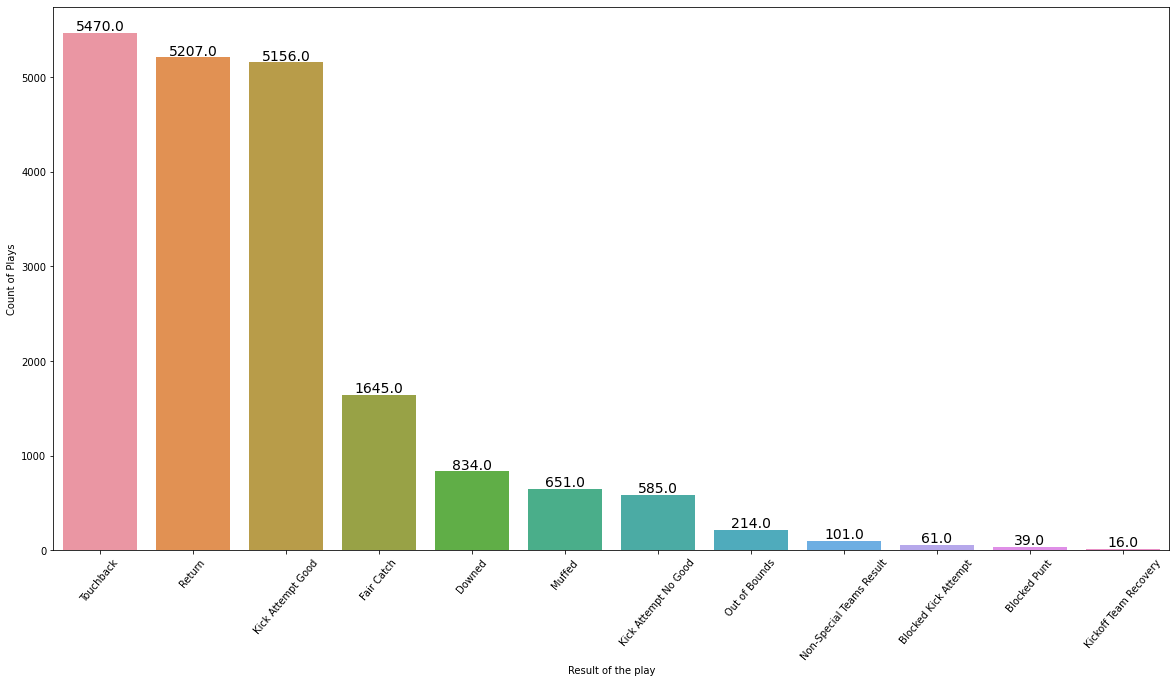

In [24]:
fig , ax = plt.subplots(figsize = (20,10))

sns.countplot(x = plays['specialTeamsResult'], order = plays['specialTeamsResult'].value_counts().index)
ax.set_xlabel('Result of the play')
ax.set_ylabel('Count of Plays')
ax.set_xticklabels(['Touchback', 'Return', 'Kick Attempt Good', 'Fair Catch', 'Downed','Muffed', 'Kick Attempt No Good',\
                    'Out of Bounds','Non-Special Teams Result', 'Blocked Kick Attempt', 'Blocked Punt',\
                    'Kickoff Team Recovery'],rotation = 50)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+140),ha='center', va='top',\
                   color='black', size=14)


Text(0, 0.5, 'Count')

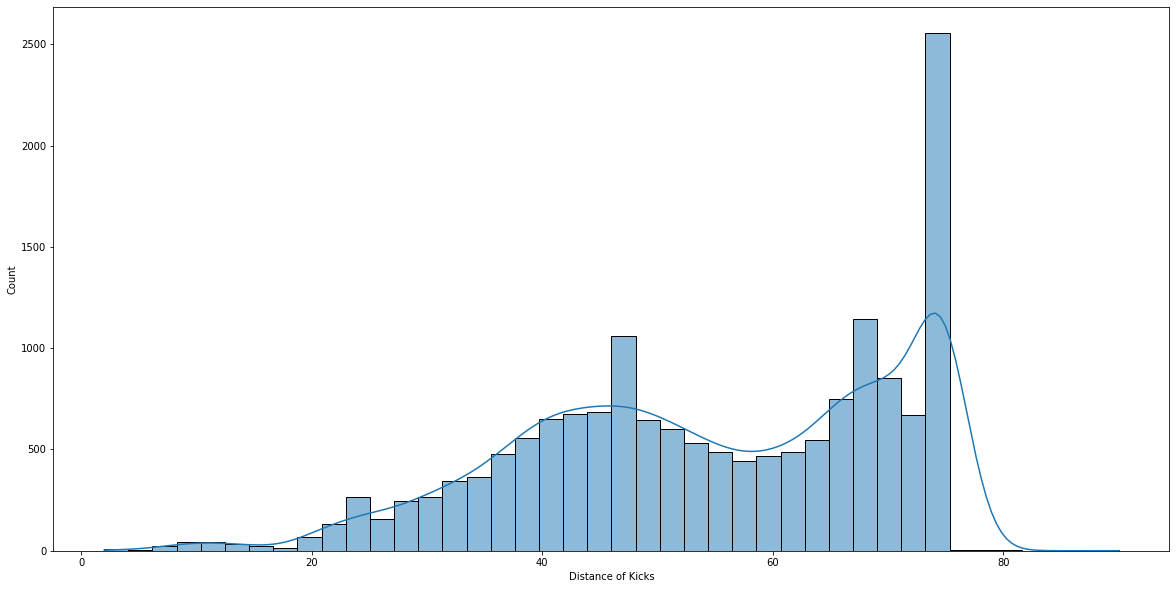

In [25]:
fig , ax = plt.subplots(figsize = (20,10))
# , order = plays['yardlineNumber'].value_counts().index
sns.histplot( plays['kickLength'], kde = True)
ax.set_xlabel('Distance of Kicks')
ax.set_ylabel('Count')
# for p in ax.patches:
#     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.5, p.get_height()+100),ha='center', va='top',\
#                    color='black', size=14)

In [26]:
print('Total Number of Plays :', len(plays['passResult']))
print('*'*50)
print('Total Number of non pass plays :', plays['passResult'].isnull().sum())

Total Number of Plays : 19979
**************************************************
Total Number of non pass plays : 19934


## Processing 2018 Tracking data

- x : 0 to 120 (in yards)
- y : 0 to 53.3 (in yards)
- s : yards/sec
- a : acc/sec^2
- dis : Distance travelled from pervious point (in yards)
- o : player Orientation (degree)
- dir : Direction of movement (degree) 

In [27]:
# tracking2018 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/tracking2018.csv')
# print('The shape of dataset for 2018 Season :', tracking2018.shape)
# print('*'*50)
# tracking2018.head().T